In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import svm
from utils.plotting import plot_data, plot_results

np.random.seed(0)

## Data generation for classification:

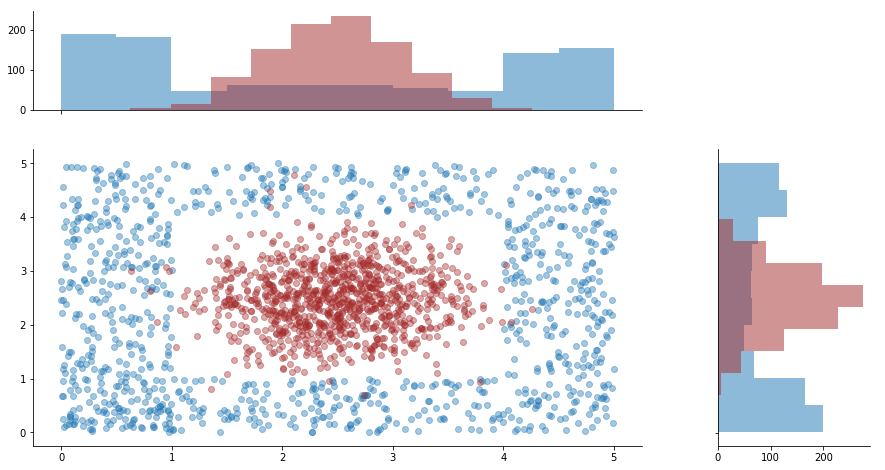

In [2]:
# generating features

# Class 1
class_size = 1000

c1_1 = np.random.rand(2, int(class_size / 4))
c1_1[0] = c1_1[0] * 4
c1_1[1] = c1_1[1] + 0
c1_2 = np.random.rand(2, int(class_size / 4))
c1_2[0] = c1_2[0] * 5
c1_2[1] = c1_2[1] + 4
c1_3 = np.random.rand(2, int(class_size / 4))
c1_3[0] = c1_3[0] + 0
c1_3[1] = c1_3[1] * 4
c1_4 = np.random.rand(2, int(class_size / 4))
c1_4[0] = c1_4[0] + 4
c1_4[1] = c1_4[1] * 4

data_c1 = np.hstack([c1_1, c1_2, c1_3, c1_4])

# Class 2
class_mean = 2.5
class_std = .6
class_size = (2, 1000)

data_c2 = np.random.normal(class_mean, class_std, class_size)

plot_data(data_c1, data_c2)

In [3]:
# adding class labels to datasets

c1 = np.ones(1000) * -1
c2 = np.ones(1000)
classes = np.hstack([c1, c2])

features = np.hstack([data_c1, data_c2])
data = np.vstack([features, classes])

#sampling datasets and splitting them into train and test set
d_train, d_test = train_test_split(data.T, test_size=0.3)

## Testing SVM

C:\Users\Laurenz\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:858: RuntimeWarning: overflow encountered in long_scalars
  max_big_small_squared = big*(small**2)


Number of support vectors: 130
Wrong predicted samples = 16
Accuracy = 0.973


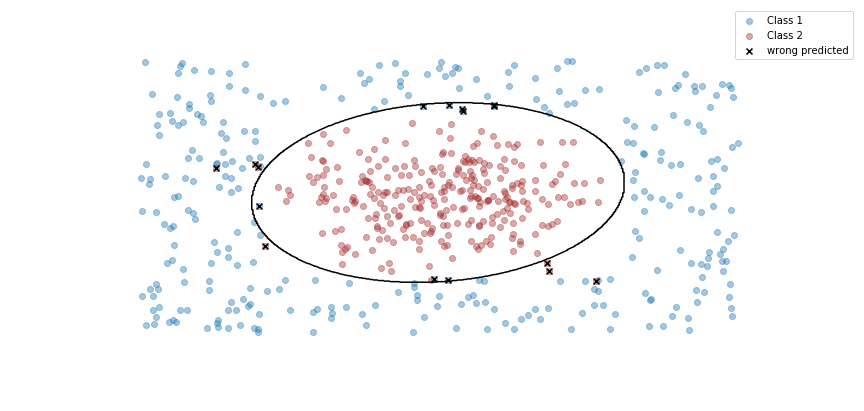

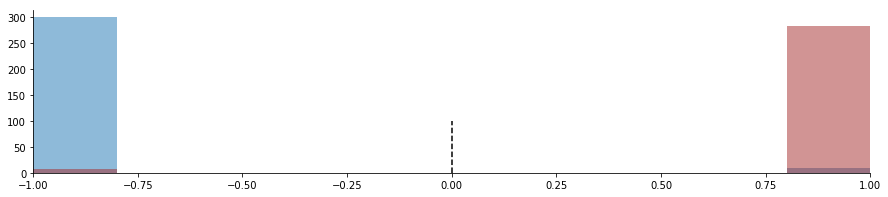

In [4]:
#Testing Classification:

X = d_train[:, 0:-1]
y = d_train[:, -1].astype(int)

model = svm.PolySupportVectorClassifier(c=1, poly=2)
model.train(X, y)

sv = model.support_vectors

plot_results(d_test.T, svm, heat=False, support_vectors=None)

Number of support vectors: 100


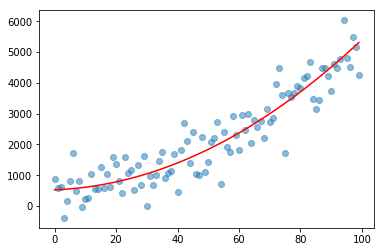

In [5]:
#Testing Regression:

#Generating Data
X = np.arange(100).astype(float)
y = 0.5 * X**2 + (np.random.randn(X.shape[0]) * 500) + 500

model = svm.PolySupportVectorRegressor(poly=2, c=1000, eta=0.1)
model.train(X.reshape([-1, 1]), y)

predicted = model.predict(X.reshape([-1, 1]))

plt.scatter(X, y, alpha=0.5)
plt.plot(X, predicted, '-r')
plt.show()